# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

### Data Cleaning

First we cleaned the data by deleting the duplicate mice found in the test.
With the data claned we proceeded to get the summaru statistics of each of the drug regimens to see the behaviour of the tumor volumes.
We took data as mean, median, variance and standard deviation to have a picture of these measures with every one of the drug regimens

### Line and Pie Chart Analysis

We did a line chart to see every drug regimen vs the number of observed mouse timepoints in the test. We can see that the 3 bigger treatments were the Capomulin, Ramicane and Ketapril.
Then we did a pie chart in order to see the male and female distribution of the population. By the pie chart we can see that we have a balanced population with almost 50/50 gender distribution. This allows us to see that the results would not be affected by some amount of load in one gender in specific

### Box Plot and Line Chart Analysis 

We did a box plot analysis for the Capomulin, Ramicane, Infubinol, and Ceftamin Drug Regimens in order to see the average tumor volumne of each regimen. With the chart we can see that the Capomulin and Ramicane treatmens have a better tumor volume reduction than the Indubinol and Ceftamin drug regimens, we will then make a line chart to see the evolution of the tumor size for every given mice and drug regimen.
With the line chart we picked the mice with ID l509 and the Capomulin regimen to see the evolution of the tumor volume. We can see in the graph that by the end of the timepoint there was a considerable reduction of the tumor volume, telling us that the drug Capomulin does well on the expected outcome.

### Scatter Plot and Correlation Analysis

We did an scatter plot in order to see the weight vs average observed tumor volume to see if there is a correlation between this 2 parameters and we found that there is a strong correlation between them since we got an index of 0.84. In the graph we can see that as the weight of the mice increases so it does the tumor volume, so we can do some conclusions for the clinical profile
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from matplotlib import colors as mcolors
import seaborn as sns
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "/Users/luisgalindez/Documents/challengue-5/challengue-5/challengue-5/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/luisgalindez/Documents/challengue-5/challengue-5/challengue-5/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

# Display the data table for preview
combined_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [3]:
# Checking the number of mice.
unique_mice = combined_df['Mouse ID'].nunique()
unique_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicated_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep= False)]
duplicated_mice

duplicate_mouse_ids = duplicated_mice['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates2 = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicates2

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

new_clean_df = combined_df[combined_df["Mouse ID"] != 'g989']
new_clean_df.head()


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [7]:
# Checking the number of mice in the clean DataFrame.
new_number_mice = new_clean_df["Mouse ID"].nunique()
new_number_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

tumor_volume_mean= new_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_volume_median= new_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume_variance= new_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_stddev= new_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_count = new_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()

tumor_volume_sem = tumor_volume_stddev / tumor_volume_count ** 0.5 

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": tumor_volume_mean,
    "Median Tumor Volume": tumor_volume_median,
    "Variance Tumor Volume": tumor_volume_variance,
    "Standard Deviation of Tumor Volume (mm3)": tumor_volume_stddev,
    "Standard Error of the Mean (SEM)": tumor_volume_sem,
})

summary_stats

Mean Tumor Volume  Median Tumor Volume  Variance Tumor Volume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Standard Deviation of Tumor Volume (mm3)  \
Drug Regimen                                             
Capomulin                                     4.994774   
Ceftamin                                      6.268188   
Infubinol                                     6.567243   
Ketapril                                      8.279709   
Naftisol                                      8.134708   
Placebo                                       7.821003   
Propriva                                      6.622085   
Ramicane                                      4.846308   
Stelasyn                                      7.710419   
Zoniferol                                     6.966589   

              Standard Error of the Mean (SEM)  
Drug Regimen                                    
Capomulin                             0.329346  
Ceftamin                              0.469821  
Infubinol                             0.492236  
Ketapril                              0.603860  
Naftisol                              0.596466  
Placebo                               0.581331  
Propriva                              0.544332  
Ramicane                              0.320955  
Stelasyn                              0.573111  
Zoniferol                             0.516398

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_2 = new_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem=lambda x: st.sem(x)  # Standard Error of the Mean
).reset_index()

summary_stats_2

Drug Regimen       mean     median   variance   std_dev       sem
0    Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva  52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane  40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

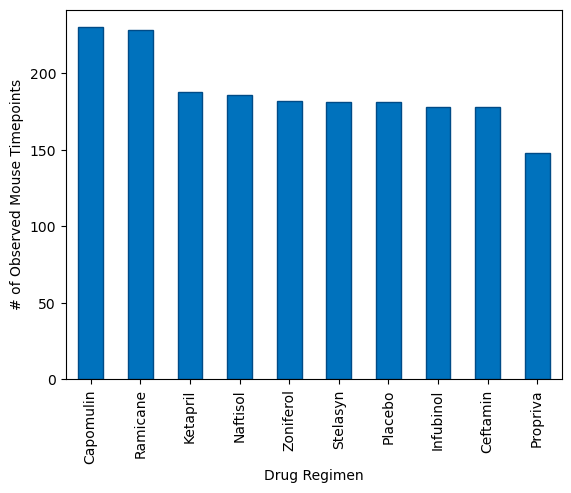

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = new_clean_df['Drug Regimen'].value_counts()

plt.figure()  
regimen_counts.plot(kind='bar', x='Drug Regimen', y='Total Rows',
                    color="#0072BD", edgecolor="#004B87")
plt.xlabel('Drug Regimen', fontsize=10)
plt.ylabel('# of Observed Mouse Timepoints', fontsize=10)

plt.show()

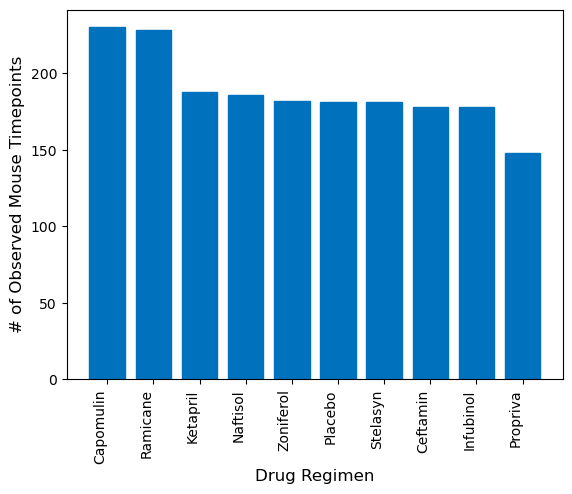

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

per_regimen_r = new_clean_df.groupby('Drug Regimen').size()
per_regimen_df = per_regimen_r.reset_index(name='Total Rows')
per_regimen_df = per_regimen_df.sort_values(by='Total Rows', ascending=False)

# Create a bar plot of total rows for each drug regimen
plt.figure()  
plt.bar(per_regimen_df['Drug Regimen'], per_regimen_df['Total Rows'], color="#0072BD", edgecolor="#0072BD", width=0.77)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('# of Observed Mouse Timepoints', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.show()

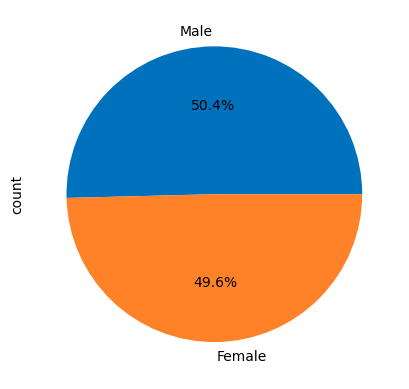

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = new_clean_df[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
colors = [(*mcolors.hex2color('#0072BD'), 1),  
          (*mcolors.hex2color('#ff7410'), 0.9)] 
plt.figure()  
gender_counts.plot.pie(autopct='%1.1f%%', colors=colors,)
plt.show()

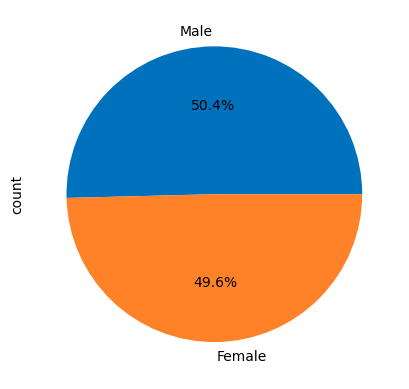

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

colors = [(*mcolors.hex2color('#0072BD'), 1),  
          (*mcolors.hex2color('#ff7410'), 0.9)] 
plt.figure() 
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, )
plt.ylabel('count')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_df = new_clean_df[new_clean_df['Drug Regimen'].isin(treatment_regimens)]
last_timepoint_df = filtered_df.loc[filtered_df.groupby('Mouse ID')['Timepoint'].idxmax()]
last_timepoint_df = last_timepoint_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
last_timepoint_df.reset_index()

index Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0    1804     a203    Infubinol         45           67.973419
1    1786     a251    Infubinol         45           65.525743
2    1856     a275     Ceftamin         45           62.999356
3    1773     a411     Ramicane         45           38.407618
4    1836     a444     Ramicane         45           43.047543
..    ...      ...          ...        ...                 ...
95   1767     y769     Ceftamin         45           68.594745
96   1797     y793    Capomulin         45           31.896238
97   1766     y865     Ceftamin         45           64.729837
98   1799     z578     Ramicane         45           30.638696
99   1784     z581    Infubinol         45           62.754451

[100 rows x 5 columns]

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
outliers_dict = {}
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
for treatment in treatment_regimens:
    subset = last_timepoint_df[last_timepoint_df['Drug Regimen'] == treatment]
    
    # Get tumor volumes
    tumor_volumes = subset['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes.tolist())  # Append to list for plotting
    
    # Calculate IQR
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify potential outliers
    outliers = subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]

    if outliers.empty:
        outliers_dict[treatment] = "Series([], Name: Tumor Volume (mm3), dtype: float64)"
    else:
        outliers_dict[treatment] = outliers['Tumor Volume (mm3)']

# Print the results in the specified order
for treatment in treatment_regimens:
    print(f"{treatment}'s potential outliers: {outliers_dict[treatment]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 420    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


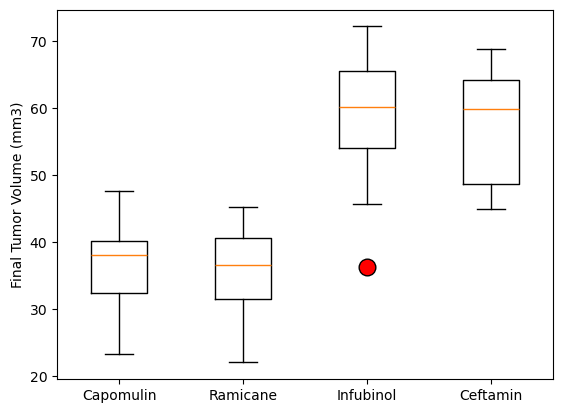

In [27]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, 
             flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=12))
ax1.set_xticklabels(treatment_regimens)
plt.show()

## Line and Scatter Plots

In [112]:
# Step 1: Filter the DataFrame for Capomulin
capomulin_df = new_clean_df[new_clean_df['Drug Regimen'] == 'Capomulin'].reset_index()

capomulin_df

index Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
0        0     b128          0           45.000000                 0   
1      226     j246          0           45.000000                 0   
2      227     r554          0           45.000000                 0   
3      228     s185          0           45.000000                 0   
4      229     b742          0           45.000000                 0   
..     ...      ...        ...                 ...               ...   
225   1854     s710         45           40.728578                 1   
226   1859     j119         45           38.125164                 1   
227   1878     i557         45           47.685963                 1   
228   1888     r944         45           41.581521                 2   
229   1889     u364         45           31.023923                 3   

    Drug Regimen     Sex  Age_months  Weight (g)  
0      Capomulin  Female           9          22  
1      Capomulin  Female          21          21  
2      Capomulin  Female           8          17  
3      Capomulin  Female           3          17  
4      Capomulin    Male           7          21  
..           ...     ...         ...         ...  
225    Capomulin  Female           1          23  
226    Capomulin  Female           7          23  
227    Capomulin  Female           1          24  
228    Capomulin    Male          12          25  
229    Capomulin    Male          18          17  

[230 rows x 9 columns]

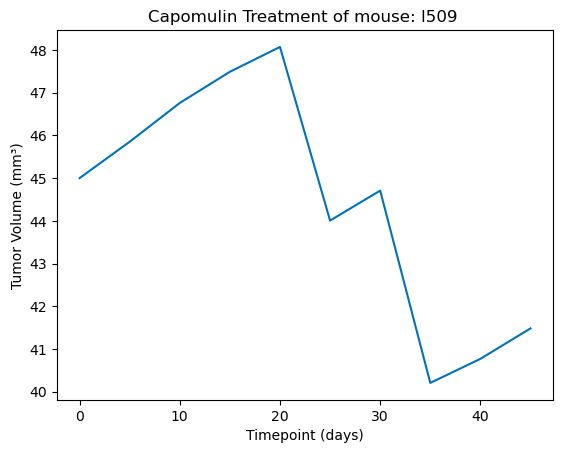

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_df = new_clean_df[new_clean_df['Drug Regimen'] == 'Capomulin']

mouse_id = "l509"
mouse_data = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color="#0072BD", linestyle='-')
plt.title(f'Capomulin Treatment of mouse: {mouse_id} ')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm³)')
plt.show()

In [119]:
capomulin_df

index Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
0        0     b128          0           45.000000                 0   
1      226     j246          0           45.000000                 0   
2      227     r554          0           45.000000                 0   
3      228     s185          0           45.000000                 0   
4      229     b742          0           45.000000                 0   
..     ...      ...        ...                 ...               ...   
225   1854     s710         45           40.728578                 1   
226   1859     j119         45           38.125164                 1   
227   1878     i557         45           47.685963                 1   
228   1888     r944         45           41.581521                 2   
229   1889     u364         45           31.023923                 3   

    Drug Regimen     Sex  Age_months  Weight (g)  
0      Capomulin  Female           9          22  
1      Capomulin  Female          21          21  
2      Capomulin  Female           8          17  
3      Capomulin  Female           3          17  
4      Capomulin    Male           7          21  
..           ...     ...         ...         ...  
225    Capomulin  Female           1          23  
226    Capomulin  Female           7          23  
227    Capomulin  Female           1          24  
228    Capomulin    Male          12          25  
229    Capomulin    Male          18          17  

[230 rows x 9 columns]

In [122]:
unique_weights = capomulin_df['Weight (g)'].unique()

# Count the number of unique weights
num_unique_weights = len(unique_weights)

# Display the unique weights and their count
print("Unique Weights:", unique_weights)
print("Number of Unique Weights:", num_unique_weights)

Unique Weights: [22 21 17 15 23 25 20 19 24]
Number of Unique Weights: 9


In [24]:
# Group by 'Weight (g)' and 'Timepoint', then calculate the mean of 'Tumor Volume (mm3)'
avg_tumor_volume_by_timepoint = capomulin_df.groupby(['Weight (g)', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()


avg_tumor_volume_by_timepoint

Weight (g)  Timepoint  Tumor Volume (mm3)
0           15          0           45.000000
1           15          5           45.473753
2           15         10           39.113891
3           15         15           39.776250
4           15         20           36.065835
..         ...        ...                 ...
85          25         25           41.086991
86          25         30           41.680791
87          25         35           40.401765
88          25         40           41.042045
89          25         45           41.581521

[90 rows x 3 columns]

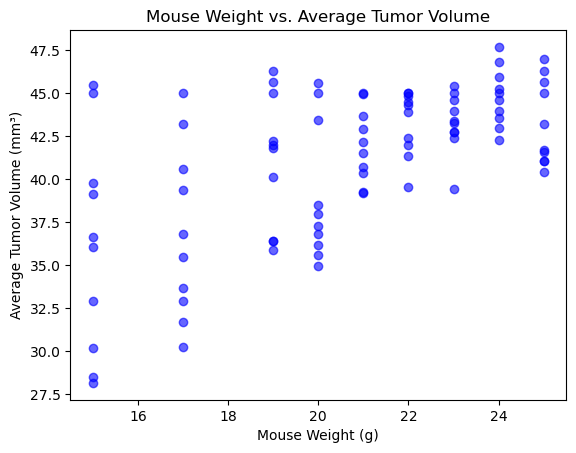

In [25]:

plt.scatter(avg_tumor_volume_by_timepoint['Weight (g)'], avg_tumor_volume_by_timepoint['Tumor Volume (mm3)'], color='blue', alpha=0.6)

# Step 2: Adding labels and title
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')
plt.show()

In [148]:
avg_tumor_volume = avg_tumor_volume_by_timepoint.groupby('Weight (g)')['Average Tumor Volume (mm³)'].mean().reset_index()

avg_tumor_volume

Weight (g)  Average Tumor Volume (mm³)
0          15                   36.182040
1          17                   36.898692
2          19                   41.182391
3          20                   39.141053
4          21                   41.974705
5          22                   43.288490
6          23                   43.287411
7          24                   44.805810
8          25                   43.294415

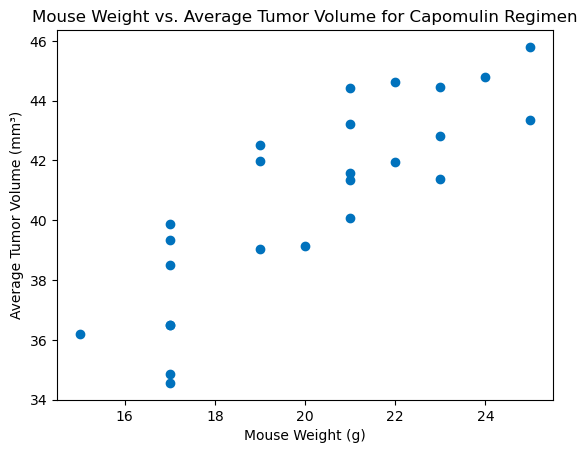

In [32]:
# Assuming you have your new_clean_df DataFrame with the necessary data
# Step 1: Filter the DataFrame for the Capomulin regimen
capomulin_df = new_clean_df[new_clean_df['Drug Regimen'] == 'Capomulin']

# Step 2: Group by 'Weight (g)' and calculate average 'Tumor Volume (mm3)'
avg_tumor_volume = capomulin_df.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean().reset_index()

# Step 3: Generate the scatter plot
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color="#0072BD", alpha=1)

# Step 4: Adding labels and title
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')
plt.show()

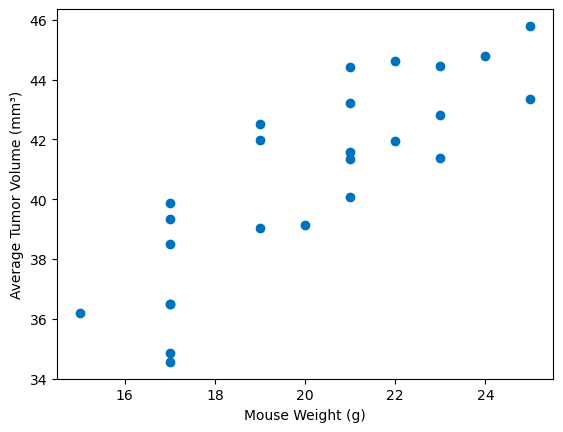

In [41]:

# Step 3: Group by 'Mouse ID' and calculate average values
cap_group = capomulin_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# Step 4: Generate the scatter plot
plt.scatter(cap_group['Weight (g)'], cap_group['Tumor Volume (mm3)'], color="#0072BD", alpha=1)

# Step 5: Adding labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')
plt.show()


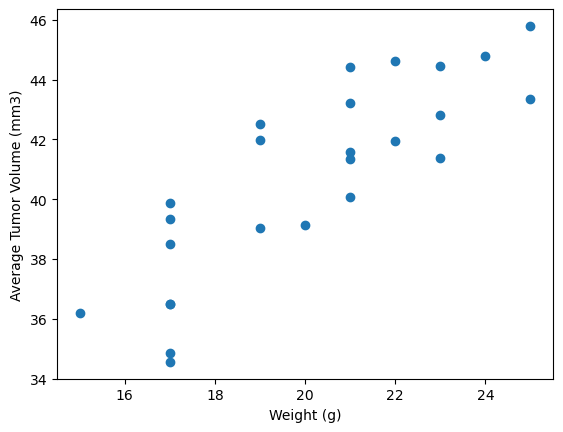

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


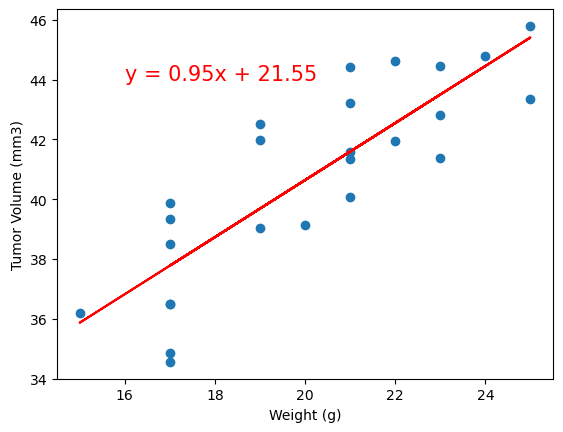

In [42]:
# Add the linear regression equation and line to plot
x_values = cap_group['Weight (g)']
y_values = cap_group['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


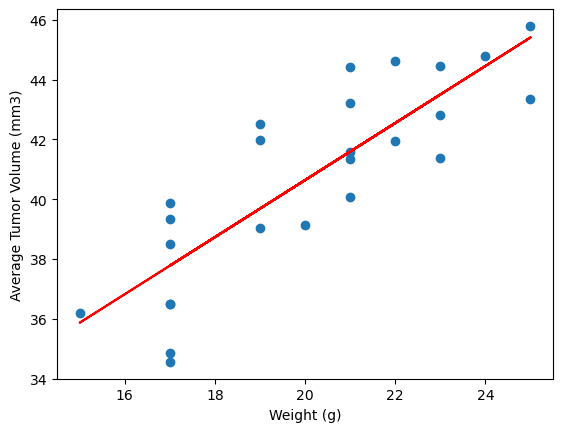

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
